### 1. Define Project


Credit scores are crucial for several reasons, as they play a significant role in the financial lives of individuals:

- Credit scores are a primary factor that lenders use to assess the creditworthiness of an individual. When someone applies for a loan, credit card, mortgage, or any other form of credit, lenders use the credit score to determine the level of risk associated with lending money to that person.
- A good credit score can lead to lower interest rates on loans and credit cards

Therefore, predicting customer's credit score contribute significantly to preventing banks from losing their money.
I collected a dataset from Kaggle including 25 attributes and 100000 instances

Objecctives:
- Identify the main factors, which affect the customer's credit score
- Predicting the customers' credit score

In this project, I will use 2 Machine Learning model: Decision Tree and Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
import statsmodels.api as sm
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import preprocessing, metrics

### 2. Data Exploration

Import dataset

I drop some columns here: ID, Customer_ID, SSN and Credit_Mix

In [2]:
table = pd.read_csv('First_Data.csv')
table = table.drop(['ID','Customer_ID','SSN','Credit_Mix'],axis = 1)
table.set_index('Index',inplace = True)
table.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Name                      100000 non-null  object 
 2   Age                       100000 non-null  int64  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    100000 non-null  int64  
 13  Changed_Credit_Limit      100000 non-null  fl

Check unique value

In [3]:
def data_type_check(df):
    check_data = pd.DataFrame({
    'Unique_data':"",
    'Dtypes':df.dtypes
    })
    for index in check_data.index:
        check_data.loc[index,'Unique_data'] = df[index].unique()
    return check_data


In [4]:
check_data = data_type_check(table)
print(check_data)

                                                                Unique_data  \
Month                                              [1, 2, 3, 4, 5, 6, 7, 8]   
Name                      [Aaron Maashoh, Rick Rothackerj, Langep, Jason...   
Age                       [23, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 4...   
Occupation                [Scientist, Teacher, Engineer, Entrepreneur, D...   
Annual_Income             [19114.12, 34847.84, 143162.64, 30689.89, 3554...   
Monthly_Inhand_Salary     [1824.843333, 3037.986667, 12187.22, 2612.4908...   
Num_Bank_Accounts                    [3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 11]   
Num_Credit_Card                      [4, 5, 1, 7, 6, 8, 3, 9, 2, 10, 11, 0]   
Interest_Rate             [3, 6, 8, 4, 5, 15, 7, 12, 20, 1, 14, 32, 16, ...   
Num_of_Loan                                  [4, 1, 3, 0, 2, 7, 5, 6, 8, 9]   
Type_of_Loan              [Auto Loan, Credit-Builder Loan, Personal Loan...   
Delay_from_due_date       [3, 5, 6, 8, 7, 13, 10, 0,

Checking missing values and duplicated values

In [5]:
df_check = pd.DataFrame({
                        'Missing Value':table.isna().sum(),
                        'Duplicated':table.duplicated().sum(),
                        'Dtype':table.dtypes
                        }
                        )
df_check

,Missing Value,Duplicated,Dtype
Month,0,0,int64
Name,0,0,object
Age,0,0,int64
Occupation,0,0,object
Annual_Income,0,0,float64
Monthly_Inhand_Salary,0,0,float64
Num_Bank_Accounts,0,0,int64
Num_Credit_Card,0,0,int64
Interest_Rate,0,0,int64
Num_of_Loan,0,0,int64


Review the statistical of numeric columns of the dataset

In [6]:
table.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,8.000000,56.000000,179987.280000,15204.633330,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


Change Data Type of Credit_Score/Credit_Mix: Good : 2 ,Standard : 1, Poor/Bad : 0

In [7]:
table['Credit_Score'].replace({'Good':2,'Standard':1,'Poor':0},inplace = True)
table.head(10)

,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Index,,,,,,,,,,,,,,,,,,,,,
0,1,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,4,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,2
1,2,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,4,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,2
2,3,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,4,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,2
3,4,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,4,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,2
4,5,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,4,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,2
5,6,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,4,809.98,27.262259,270,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,2
6,7,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,4,809.98,22.537593,271,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,2
7,8,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,...,4,809.98,23.933795,272,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,1
8,1,Rick Rothackerj,28,Teacher,34847.84,3037.986667,2,4,6,1,...,2,605.03,24.464031,319,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,1


The 'Name' column is duplicated, so we need to combine to one row. If the column has the numerical data, we will get its mean or if it has categorical data, we will get its final row

In [8]:
tb = table.drop(['Month','Age'],axis=1)
last_row = tb.groupby(['Name']).mean().reset_index()
for key,value in last_row['Credit_Score'].items():
    if value > 1.3 :
        last_row.loc[key,'Credit_Score'] = 'Good'
    elif (value > 0.7):
        last_row.loc[key,'Credit_Score'] = 'Standard'
    else:
        last_row.loc[key,'Credit_Score'] = 'Poor'
        

cate_df = table.drop_duplicates('Name',keep='last')
cate_col = table.select_dtypes(exclude = 'number').columns
last_row = pd.merge(last_row,cate_df[cate_col],how='inner',on = 'Name')
last_row.head(5)

C:\Users\tranm\AppData\Local\Temp\ipykernel_22352\3718190196.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  last_row = tb.groupby(['Name']).mean().reset_index()


,Name,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation,Type_of_Loan,Payment_of_Min_Amount,Payment_Behaviour
0,A. Ananthalakshmih,9166.465,517.872083,9.0,5.0,22.0,3.0,16.2500,19.5000,11.385,...,32.664786,151.625,21.385997,0.000000,276.600533,Poor,Accountant,"Home Equity Loan, Payday Loan, and Personal Loan",Yes,Low_spent_Small_value_payments
1,A. Ananthalakshmiq,104658.750,8434.562500,4.0,7.0,11.0,1.0,14.7500,14.2500,17.760,...,32.899609,344.500,52.071931,58.580612,637.871666,Standard,Musician,Not Specified,Yes,Low_spent_Large_value_payments
2,A. Ananthalakshmix,88346.480,7289.206667,4.0,3.0,18.0,1.0,10.2500,13.2500,19.560,...,35.974527,272.500,46.659914,97.925283,636.918849,Standard,Manager,Debt Consolidation Loan,Yes,Low_spent_Medium_value_payments
3,A. Anathalakshmis,7097.015,500.417917,10.0,9.0,22.0,7.0,52.7500,23.0000,23.840,...,29.021174,31.500,34.010459,13.234072,270.593447,Poor,Entrepreneur,"Not Specified, Home Equity Loan, Payday Loan, ...",Yes,Low_spent_Small_value_payments
4,A.b,27003.280,2169.773333,4.5,3.0,15.0,4.5,17.0625,10.5625,6.825,...,32.123291,176.500,28.925778,31.999871,369.555356,Standard,Writer,"Debt Consolidation Loan, Mortgage Loan, Not Sp...",Yes,Low_spent_Small_value_payments


Visualize the numerical data and determine if it has significant effect on the credit score

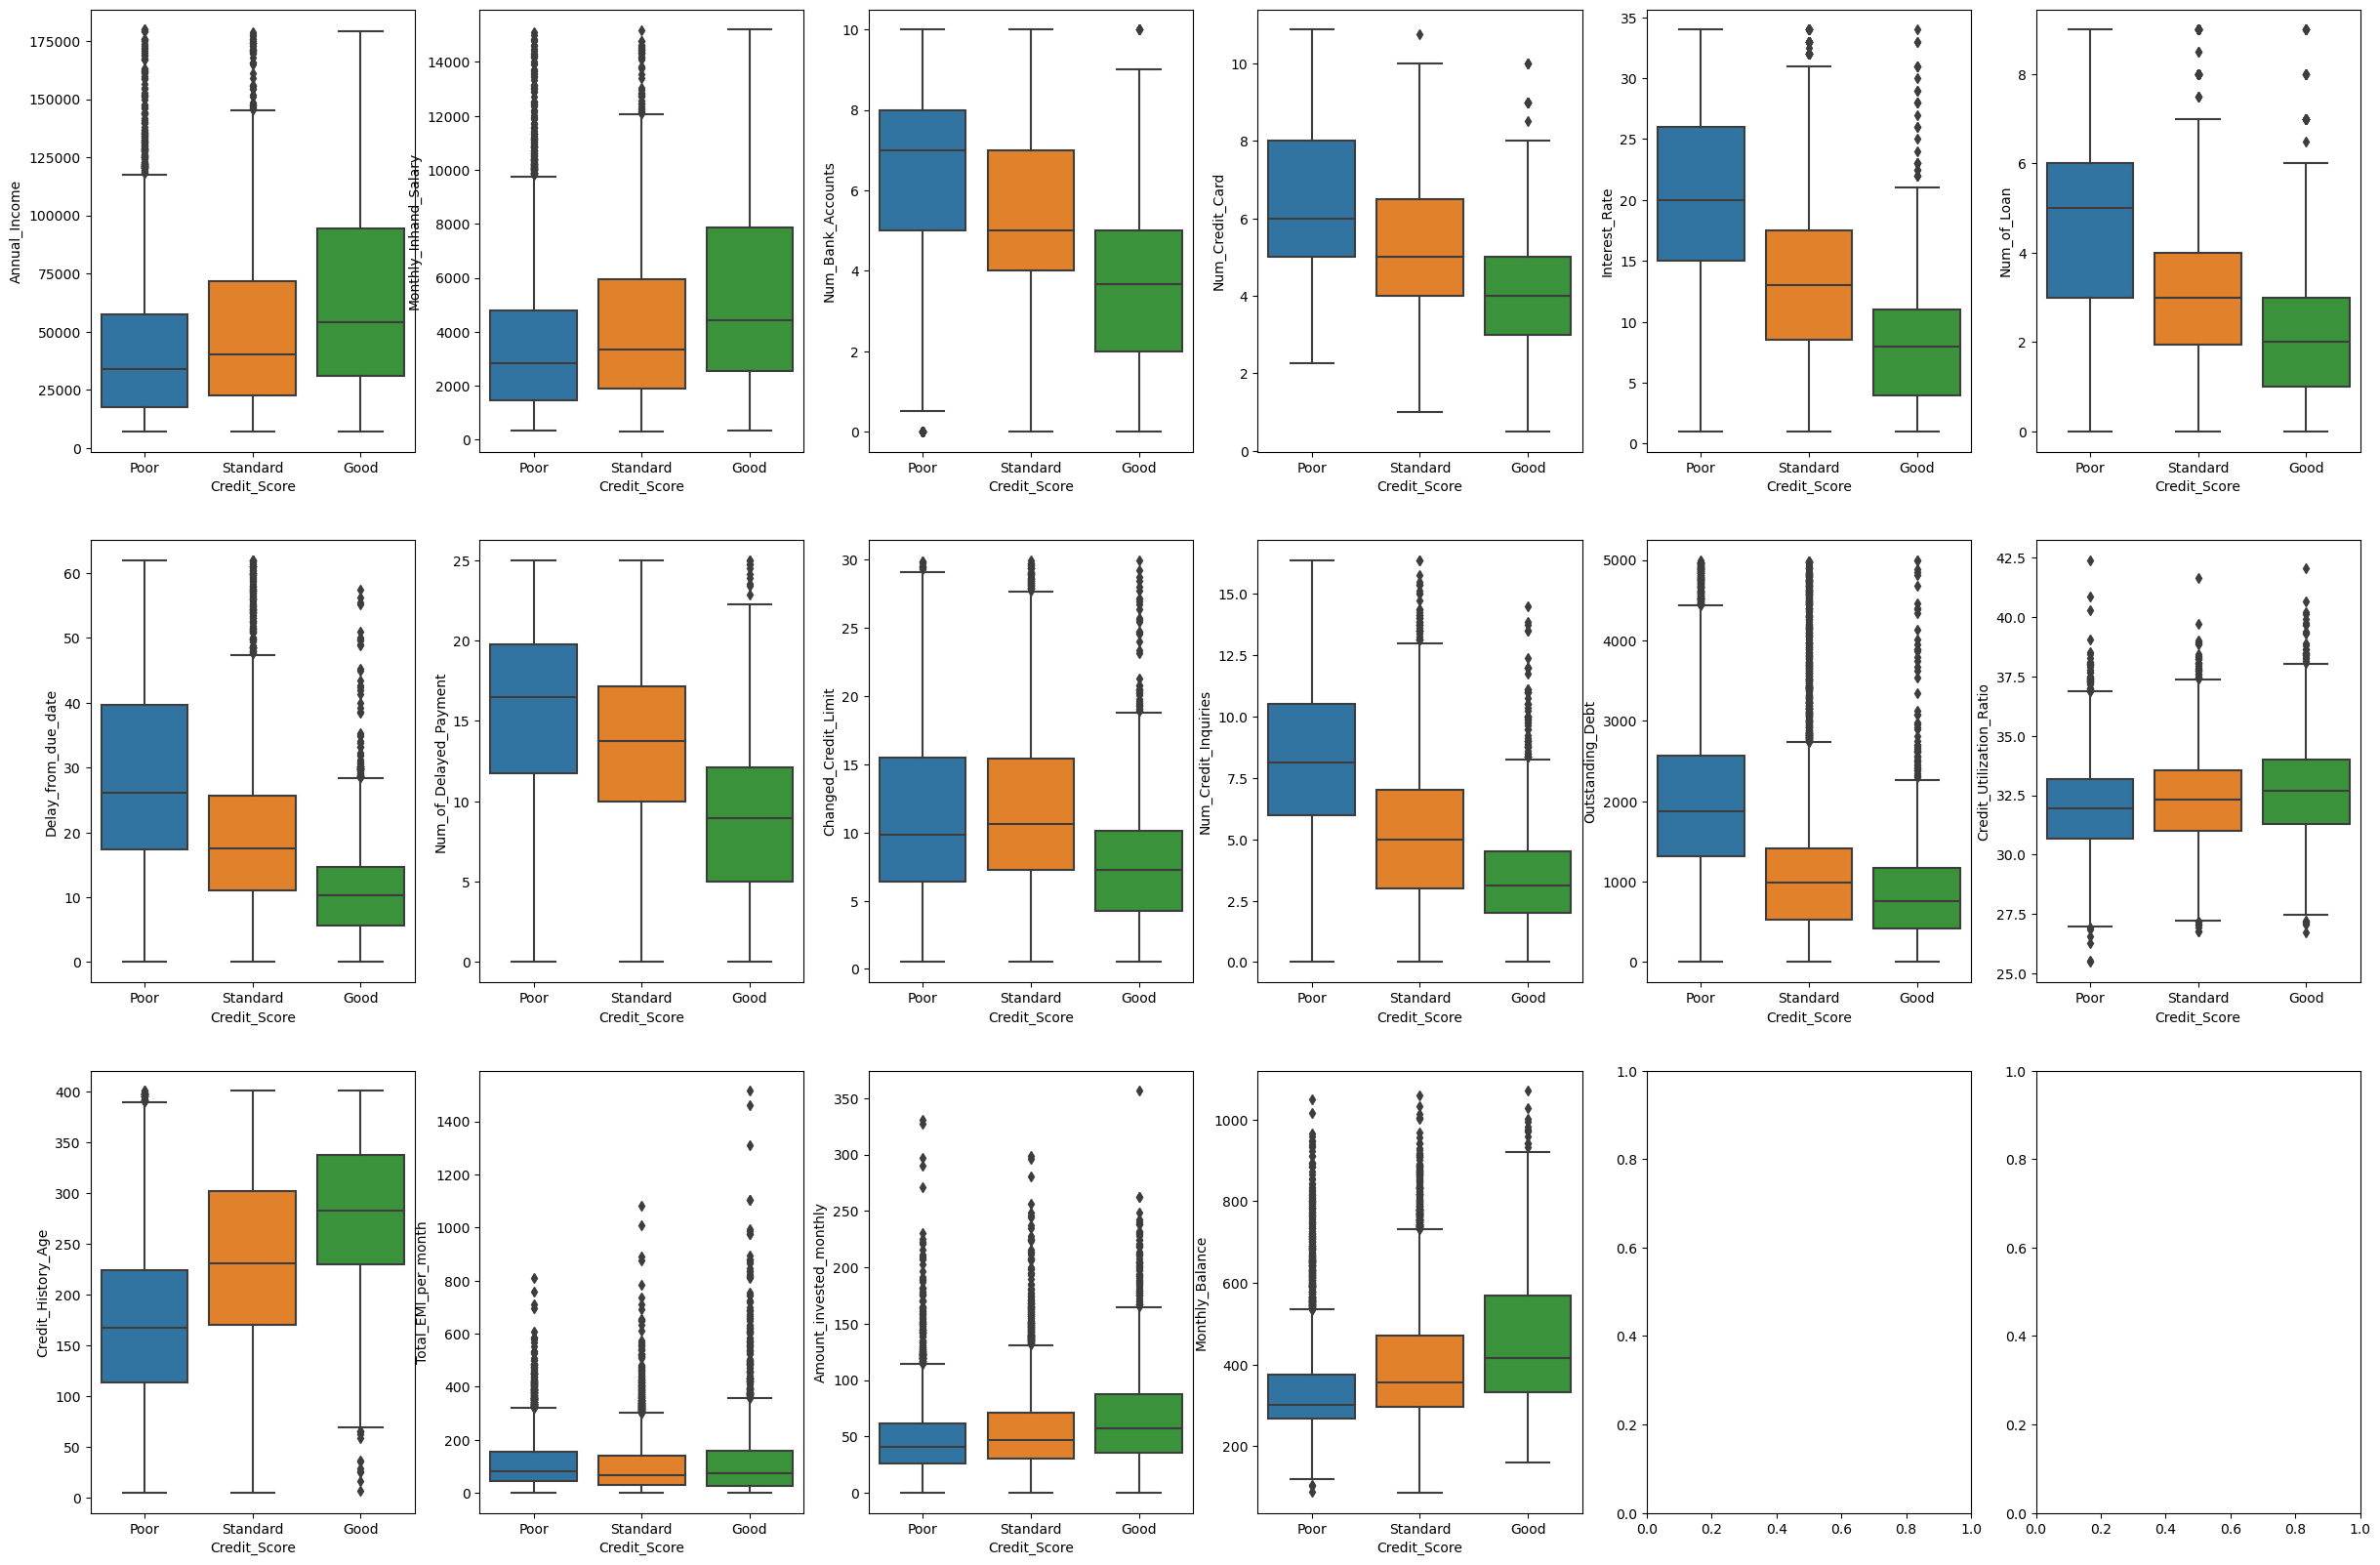

In [9]:
num_graph = last_row.select_dtypes(include='number').columns
fig,ax = plt.subplots(nrows=3,ncols=6, figsize=(30,20))
for value, pos in zip (num_graph, ax.flatten()):
    sns.boxplot(data = last_row, x = 'Credit_Score', y = value, ax = pos)

Visualize the categorical data and determine if it has significant effect on the credit score

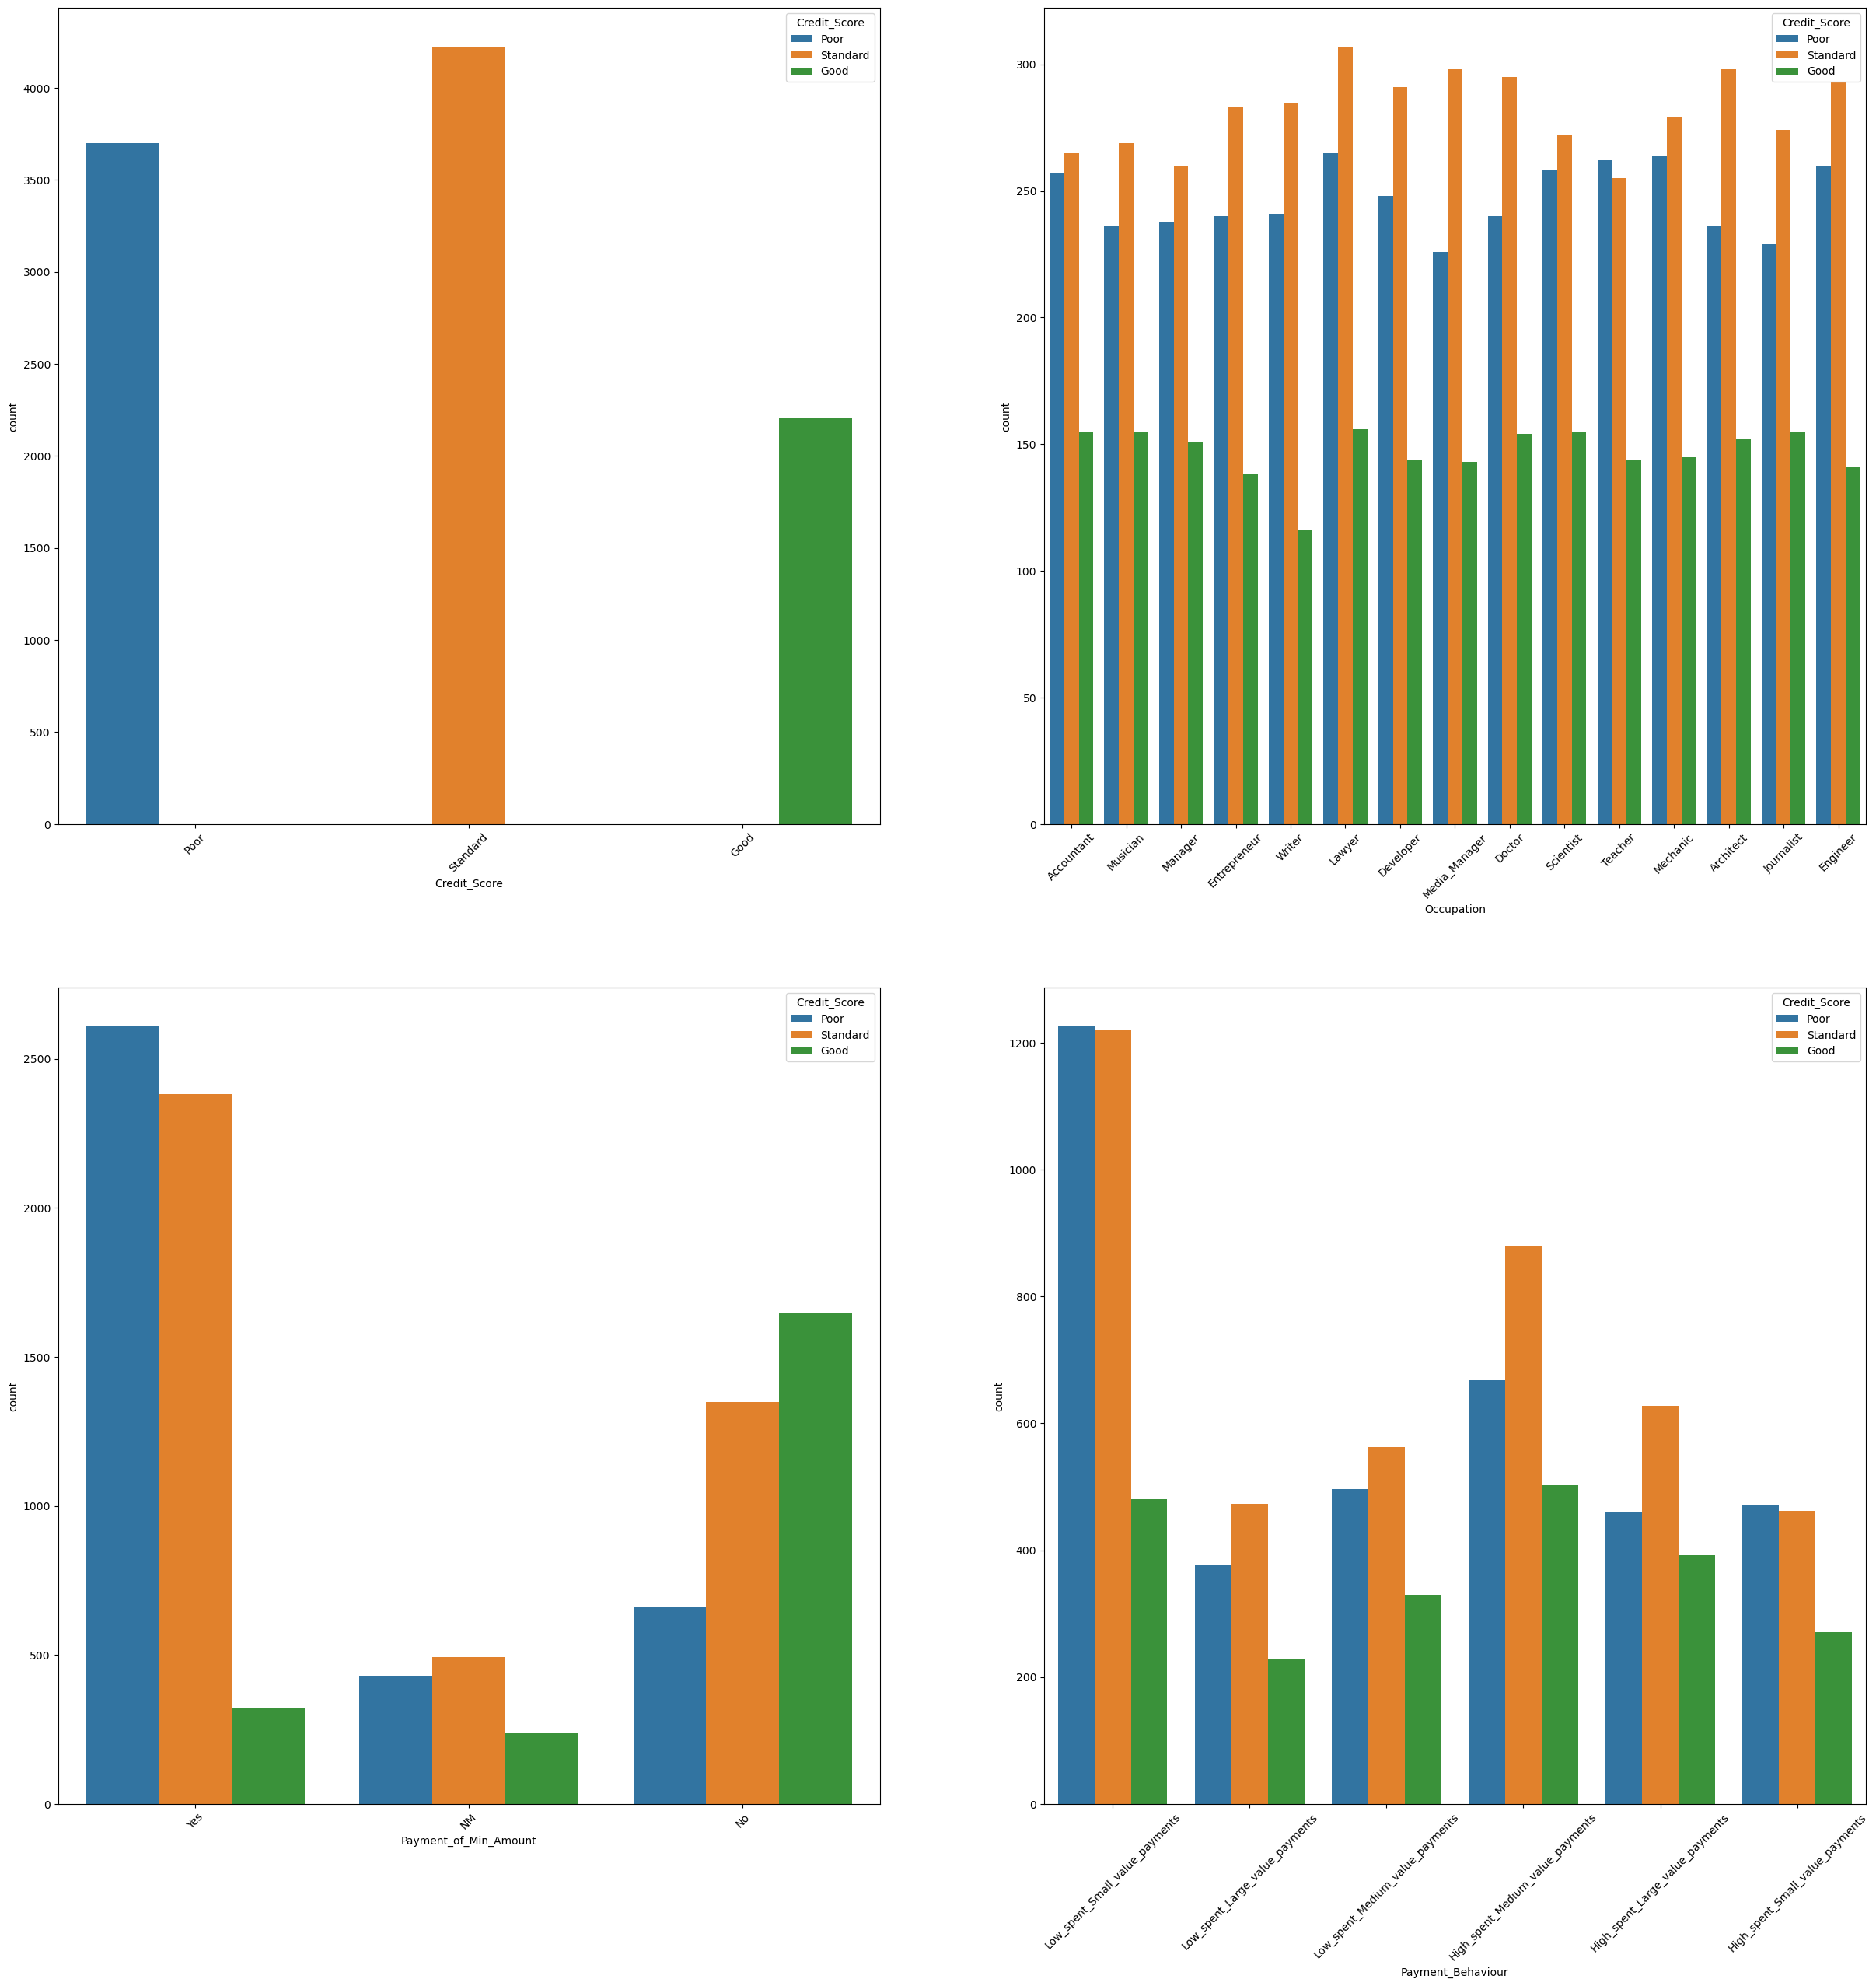

In [10]:
cate_col = last_row.select_dtypes(exclude = 'number').columns
cate_col = cate_col.drop(['Name','Type_of_Loan'])
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(30,30))

for value, pos in zip (cate_col, ax.flatten()):
    my_plot = sns.countplot(data=last_row,x = value, ax = pos, hue='Credit_Score')
    my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation = 45)

Visualize the correlation among variables

<Axes: >

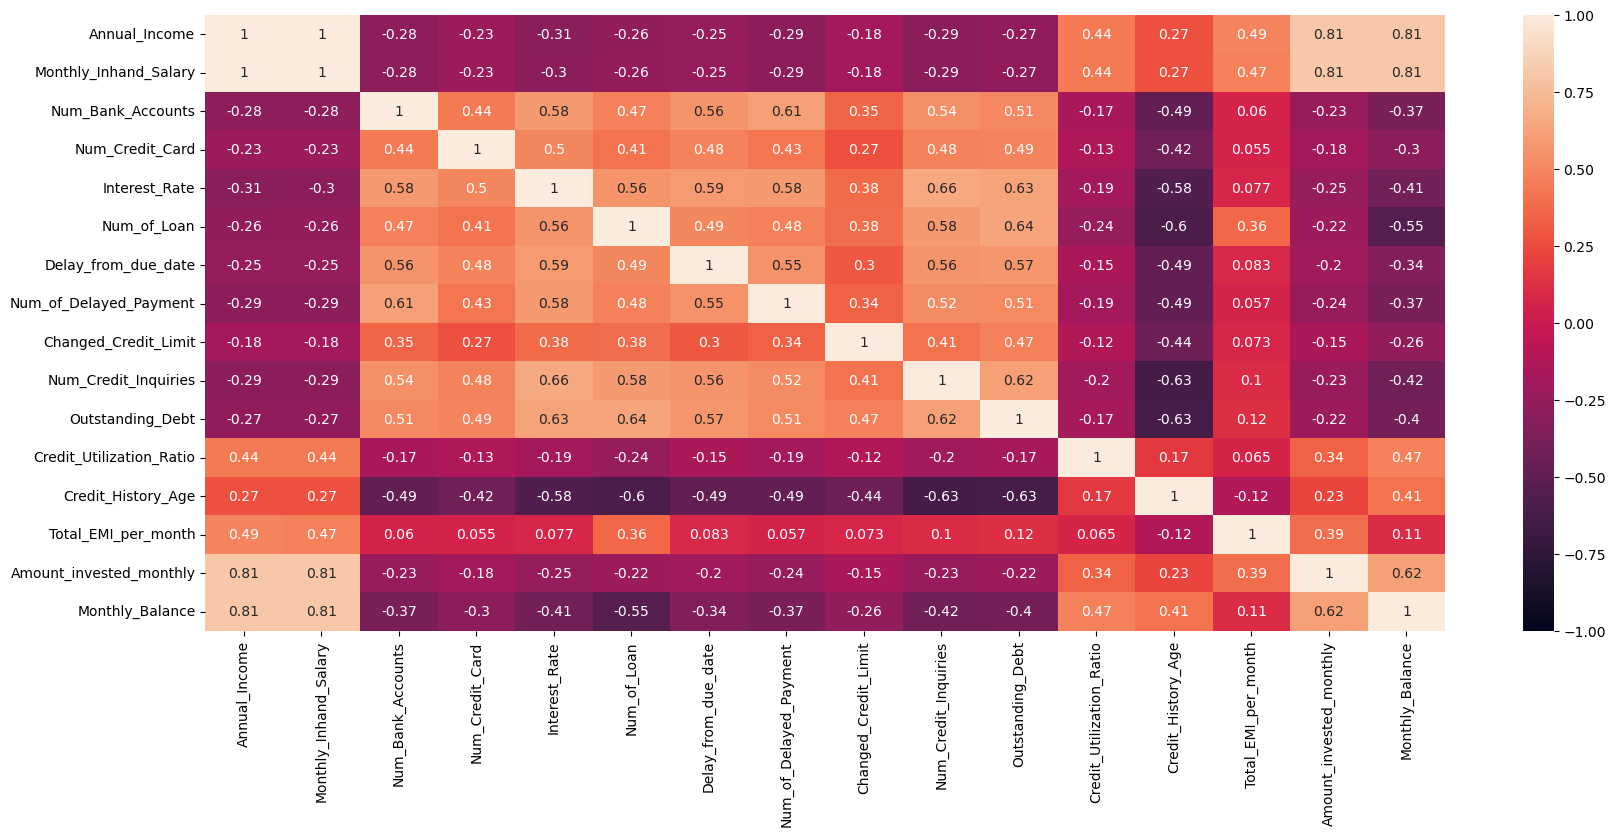

In [11]:
nummatrix = last_row.select_dtypes(include='number')
corr = nummatrix.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr,vmin = -1,vmax = 1, annot = True)

### Analysis:

- By looking at visualization of the object variables, I can see some factors affecting significantly the credit score. For instance,
Most of occupations have the highest number of people in 'Standard' credit score. Jobs such as lawyer, musician, accountant also have the highest number of people in 'Good' credit score
- By looking at visualization of the numerical variables, I see that 'Total_EMI_per_month','Credit_Mix' are the outliers
- Some variables are highly correlated. They are 'Annual_Income' and 'Monthly_Balance' or 'Amount_invested_monthly' and 'Annual_Income'.

# 3. Data Processing and Develop the model

I prevent the outliers from affecting the model

In [12]:
def drop_outlier(df,col):
    Q1 = np.percentile(df[col], 25, interpolation = 'midpoint') 
    Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    print("Old Shape: ", df.shape)
    upper_limit = Q3+1.5*IQR # percentile75 + 1.5 * IQR
    lower_limit = Q1-1.5*IQR
    newdf=df[(df[col] < upper_limit) & (df[col] > lower_limit)] 
    print("New Shape : ", newdf.shape)
    return newdf

In [13]:
last_row = drop_outlier(last_row,'Total_EMI_per_month')

Old Shape:  (10128, 22)
New Shape :  (9654, 22)


C:\Users\tranm\AppData\Local\Temp\ipykernel_22352\15052880.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
C:\Users\tranm\AppData\Local\Temp\ipykernel_22352\15052880.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')


Splitting data frame into 2 parts for building model

In [14]:
x = last_row.select_dtypes(include = 'number')
y = last_row['Credit_Score']
stratified_kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [15]:
data_type_check(x)

,Unique_data,Dtypes
Annual_Income,"[9166.465, 104658.75, 88346.48, 7097.015, 2700...",float64
Monthly_Inhand_Salary,"[517.8720833, 8434.5625, 7289.206667, 500.4179...",float64
Num_Bank_Accounts,"[9.0, 4.0, 10.0, 4.5, 1.0, 7.0, 3.0, 2.0, 5.0,...",float64
Num_Credit_Card,"[5.0, 7.0, 3.0, 9.0, 4.0, 6.0, 4.5, 8.0, 5.5, ...",float64
Interest_Rate,"[22.0, 11.0, 18.0, 15.0, 6.0, 21.0, 14.0, 19.0...",float64
Num_of_Loan,"[3.0, 1.0, 7.0, 4.5, 0.0, 2.0, 4.0, 5.0, 8.0, ...",float64
Delay_from_due_date,"[16.25, 14.75, 10.25, 52.75, 17.0625, 13.125, ...",float64
Num_of_Delayed_Payment,"[19.5, 14.25, 13.25, 23.0, 10.5625, 0.625, 19....",float64
Changed_Credit_Limit,"[11.385, 17.76, 19.56, 23.84, 6.825, 9.98, 17....",float64
Num_Credit_Inquiries,"[10.75, 8.375, 0.0, 11.0, 5.0, 7.5, 7.0, 5.75,...",float64


In [16]:
y.replace({'Good':2,'Standard':1,'Poor':0},inplace =True)

### 3.1. Develop Decision Tree Model

Splitting the data frame to 2 parts for building and testing the model

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

Build model

In [18]:
DT_model = DecisionTreeClassifier(criterion = 'entropy',min_samples_leaf = 5,random_state = 100,max_depth = 3)
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

Showing the accuracy of the model in order to evaluate how well it does

In [19]:
y_pred_DT = DT_model.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred_DT)*100)

Accuracy is:  63.75560925094926


I draw the decision tree to show cycle of choosing variable that has the most information gain and splitting data to predict the result. Each cell shows the chosen variable, entropy for IG, total samples, quantity of each type and the type account mostly  

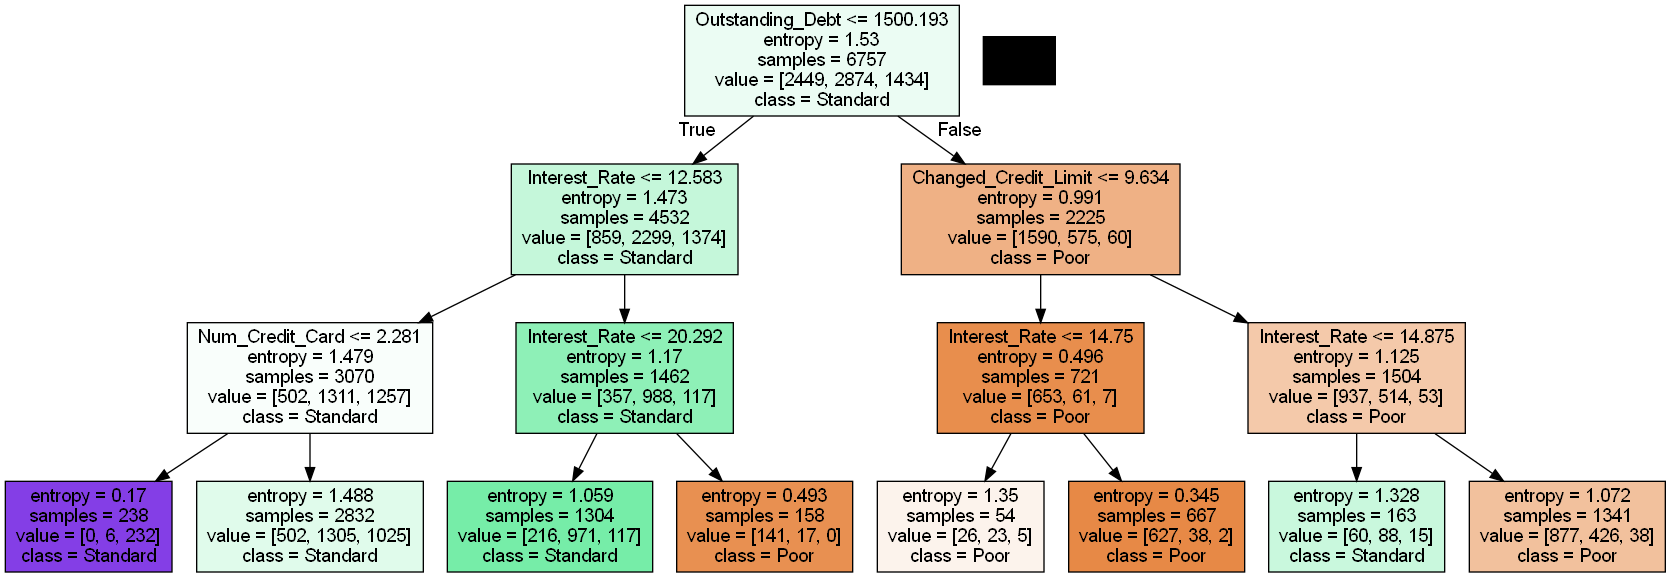

In [20]:
xc = x.columns
y_tree = y
y_tree.replace({2:'Good',1:'Standard',0:'Poor'},inplace=True)
dot_data = tree.export_graphviz(DT_model,feature_names = xc, class_names = y,filled = True,impurity = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

As I see from this confusion matrix, I can determine how well the model work with True Positive value: 869

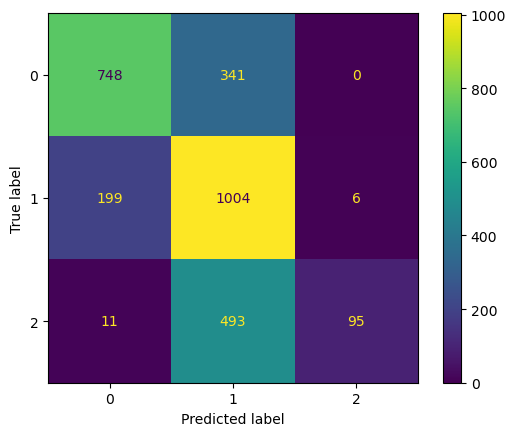

In [21]:
cm = confusion_matrix(y_test,y_pred_DT)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [22]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1089
           1       0.55      0.83      0.66      1209
           2       0.94      0.16      0.27       599

    accuracy                           0.64      2897
   macro avg       0.76      0.56      0.55      2897
weighted avg       0.72      0.64      0.61      2897



In [23]:
def importance_features(model_name,_model,_x,_y,_cv):
    """
    Extract top 10 important features of the model
    
    Parameters
    ----------
    model_name: str
        Name of the model
    _model: machine learning model
    _x: pandas series
        Independent variables
    _y: pandas series
        Dependent variables
    _cv: cross-validation method
    """
    for train_index, test_index in _cv.split(_x, _y):
        # Create traning and testing data
        X_train, X_test = _x[train_index], _x[test_index]
        y_train, y_test = _y[train_index], _y[test_index]

        # Extract importance feature
        dt_model = _model.fit(X_train, y_train)
        importances_sk = dt_model.feature_importances_
        feature_importance_sk = {}
        for i, feature in enumerate(x.columns):
            feature_importance_sk[feature] = round(importances_sk[i], 3)

        # Create dataframe of result
        importance_features_df = pd.DataFrame(list(feature_importance_sk.items()))
        importance_features_df.rename({0:'feature',1:'Importance'},axis=1,inplace=True)
        importance_features_df.sort_values('Importance',ascending=False,inplace=True) 
    print('Top 10 importance features of ' + model_name)
    return importance_features_df.head(10)

In [24]:
importance_features('Decision_Tree model',DT_model, x_test.to_numpy(), y_pred_DT, stratified_kf)

Top 10 importance features of Decision_Tree model


,feature,Importance
10,Outstanding_Debt,0.558
4,Interest_Rate,0.243
3,Num_Credit_Card,0.176
8,Changed_Credit_Limit,0.020
7,Num_of_Delayed_Payment,0.002
0,Annual_Income,0.000
1,Monthly_Inhand_Salary,0.000
2,Num_Bank_Accounts,0.000
5,Num_of_Loan,0.000
6,Delay_from_due_date,0.000


### 3.2 Develop Logistic Regression

In [25]:
#Define model
log_model = LogisticRegression()

In [26]:
log_model.fit(x_train,y_train)
y_pred_log = log_model.predict(x_test)

c:\Users\tranm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


When I look at the table, I see that the more bank account people have, the better their credit score is, while the more credit cards they have the worse their credit score is

In [27]:

Sum_table = sm.OLS(y_pred_log,x_test).fit()
Sum_table.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1643.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:12:46   Log-Likelihood:                         -663.99
No. Observations:                2897   AIC:                                      1360.
Df Residuals:                    2881   BIC:                                      1456.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Annual_Income             1.181e-05   2.83e-06      4.168      0.000    6.25e-06    1.74e-05
Monthly_Inhand_Salary    -5.052e-05   3.42e-05     -1.478      0.140      -0.000    1.65e-05
Num_Bank_Accounts            0.0009      0.003      0.264      0.792      -0.006       0.007
Num_Credit_Card             -0.0036      0.004     -0.999      0.318      -0.011       0.003
Interest_Rate               -0.0076      0.001     -7.033      0.000      -0.010      -0.006
Num_of_Loan                  0.0073      0.005      1.575      0.115      -0.002       0.016
Delay_from_due_date         -0.0026      0.001     -4.513      0.000      -0.004      -0.001
Num_of_Delayed_Payment       0.0013      0.001      0.930      0.352      -0.001       0.004
Changed_Credit_Limit         0.0050      0.001      4.542      0.000       0.003       0.007
Num_Credit_Inquiries        -0.0079      0.002     -3.186      0.001      -0.013      -0.003
Outstanding_Debt            -0.0002   8.39e-06    -26.293      0.000      -0.000      -0.000
Credit_Utilization_Ratio     0.0290      0.001     20.219      0.000       0.026       0.032
Credit_History_Age           0.0021   8.53e-05     24.850      0.000       0.002       0.002
Total_EMI_per_month         -0.0009      0.000     -6.893      0.000      -0.001      -0.001
Amount_invested_monthly      0.0004      0.000      1.328      0.184      -0.000       0.001
Monthly_Balance             -0.0013   9.29e-05    -13.904      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       70.508   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.203
Skew:                           0.224   Prob(JB):                     7.61e-12
Kurtosis:                       2.528   Cond. No.                     4.89e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1089
           1       0.55      0.83      0.66      1209
           2       0.94      0.16      0.27       599

    accuracy                           0.64      2897
   macro avg       0.76      0.56      0.55      2897
weighted avg       0.72      0.64      0.61      2897



In [29]:
print("Accuracy is: ",accuracy_score(y_test,y_pred_log)*100)

Accuracy is:  57.680358992060754
